In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Import heart dataset
data = pd.read_csv('heart.csv')
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


###### Dataframe info

In [4]:
print(f"Data shape: \n {data.shape} \n")
print(f"Data columns: \n {data.columns} \n")
print(f"Data index: \n {data.index} \n")
print(f"Data values: \n {data.values} \n")
print(f"Data info: \n {data.info} \n")
print(f"Data summary: \n")
data.describe()

Data shape: 
 (303, 14) 

Data columns: 
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object') 

Data index: 
 RangeIndex(start=0, stop=303, step=1) 

Data values: 
 [[63.  1.  3. ...  0.  1.  1.]
 [37.  1.  2. ...  0.  2.  1.]
 [41.  0.  1. ...  0.  2.  1.]
 ...
 [68.  1.  0. ...  2.  3.  0.]
 [57.  1.  0. ...  1.  3.  0.]
 [57.  0.  1. ...  1.  2.  0.]] 

Data info: 
 <bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


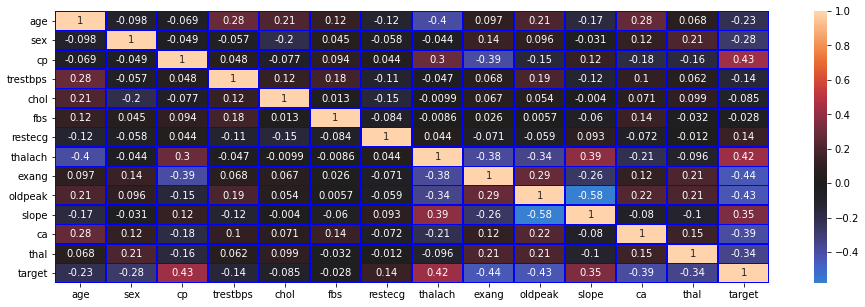

In [6]:
# Correlation matrix
corr_matrix_origin = (data.loc[:, data.columns]).corr(method ='pearson')
list_col_origin = list(data.columns)
plt.figure(figsize = (16,5))
ax = sns.heatmap(corr_matrix_origin, annot=True,
                 yticklabels=list_col_origin,
                 xticklabels=list_col_origin,
                 annot_kws={'size': 10},
                linecolor='blue', center=False,  linewidths=.5)

As we can see from previous heatmap correlation matrix we don't have high corelation between features. 

#### Data visualisation

In [23]:
# Let see the distribution of each independent variable
# First we will define function for subplots of histograms
def sub_hist(data, m=15, n=25, num_col = None, *args):
    if data.shape[1] %2 == 0:
        i = data.shape[1]//num_col
    else:
        i = data.shape[1]//num_col + 1
    fig, axes = plt.subplots(i, num_col, figsize=(m, n))
    for i in range(i):
        for j in range(num_col):
            if (2*i+j) < data.shape[1]:
                sns.distplot(data[data.columns[2*i+j]], ax=axes[i,j] )
            else:
                axes[i,j].set_axis_off()
# data_col = list(data.columns)
# data_col.remove('target')
# fig, axes = plt.subplots(data.shape[1]//2, 2, figsize=(15, 25))
# for col_name in data_col:
#     for i in range(data.shape[1]//2)
# sns.distplot(data['fixed acidity'], bins=15, ax=axes[0,0] )#.set_title('Dist of fixed acidity')
# sns.distplot(data['volatile acidity'], bins=15, ax=axes[0,1] )#.set_title('Dist of volatile acidity')
# sns.distplot(data['citric acid'], bins=15, ax=axes[1,0] )#.set_title('Dist of citric acid')
# sns.distplot(data['residual sugar'], bins=15, ax=axes[1,1] )#.set_title('Dist of residual sugar')
# sns.distplot(data['chlorides'], bins=15, ax=axes[2,0] )#.set_title('Dist of chlorides')
# sns.distplot(data['free sulfur dioxide'], bins=15, ax=axes[2,1] )#.set_title('Dist of free sulfur dioxide')
# sns.distplot(data['total sulfur dioxide'], bins=15, ax=axes[3,0] )#.set_title('Dist of total sulfur dioxide')
# sns.distplot(data['density'], bins=15, ax=axes[3,1] )#.set_title('Dist of density')
# sns.distplot(data['pH'], bins=15, ax=axes[4,0] )#.set_title('Dist of pH')
# sns.distplot(data['sulphates'], bins=15, ax=axes[4,1] )#.set_title('Dist of sulphates')
# sns.distplot(data['alcohol'], bins=15, ax=axes[5,0] )#.set_title('Dist of alcohol')
# sns.countplot(data['type'], ax=axes[5,1] )#.set_title('Dist of type')


In [18]:
data_continual = data.iloc[:, [0,3,4,7,9]]
data_continual

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


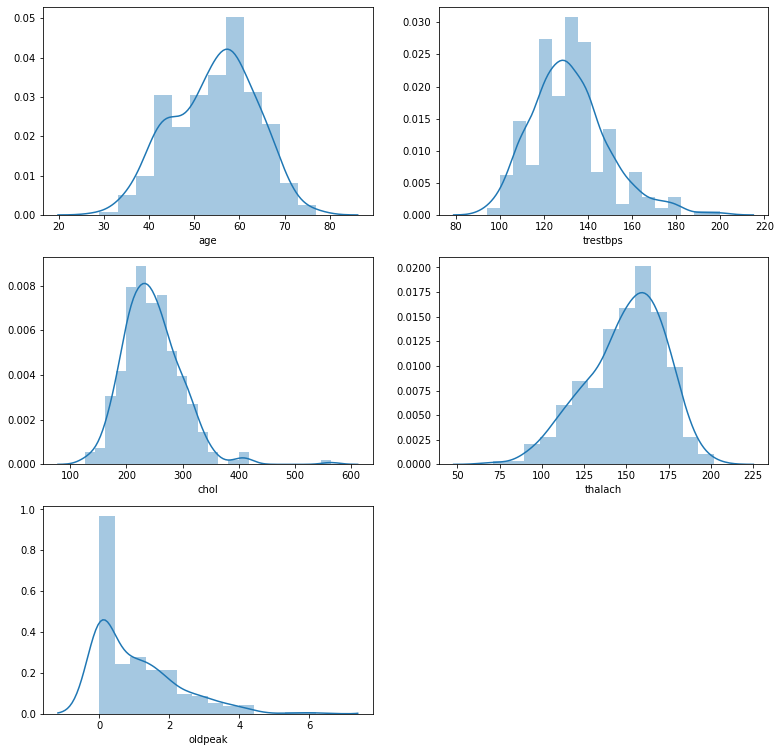

In [26]:
# Let see the distribution of each continual feature in dataset
sub_hist(data_continual,m=13,n=13, num_col = 2)

In [29]:
# Let create function for subplots of boxplots
def sub_boxplot(data, m=15, n=25, num_col = None, y=None, hue=None, orient='h', *args):
    if data.shape[1] %2 == 0:
        i = data.shape[1]//num_col
    else:
        i = data.shape[1]//num_col + 1
    fig, axes = plt.subplots(i, num_col, figsize=(m, n))
    for i in range(i):
        for j in range(num_col):
            if (2*i+j) < data.shape[1]:
                sns.boxplot(x = data.columns[2*i+j], y=y, data=data, hue=hue, orient=orient , ax=axes[i,j] )
            else:
                axes[i,j].set_axis_off()

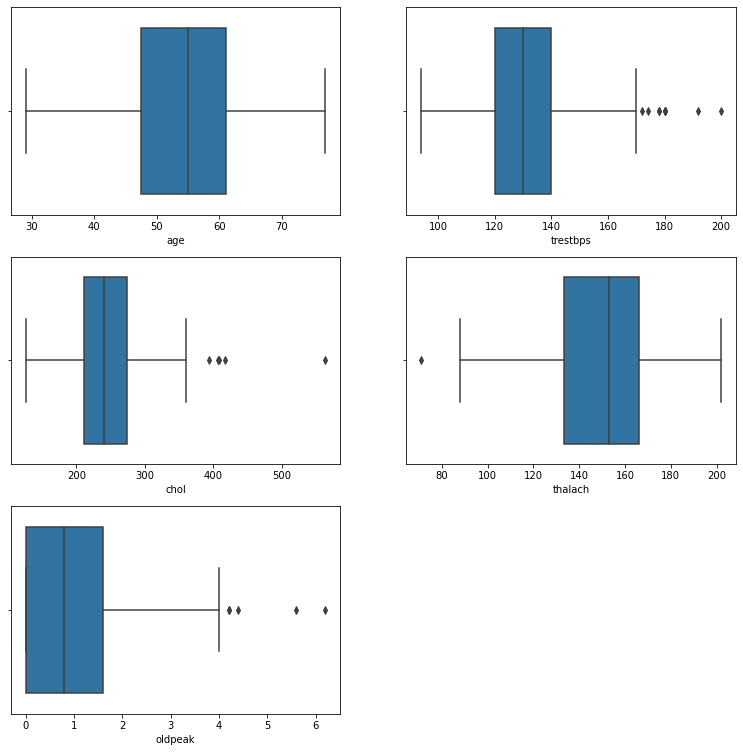

In [30]:
# Let see the distribution of each continual feature in dataset using boxplots
sub_boxplot(data_continual,m=13,n=13, num_col = 2)

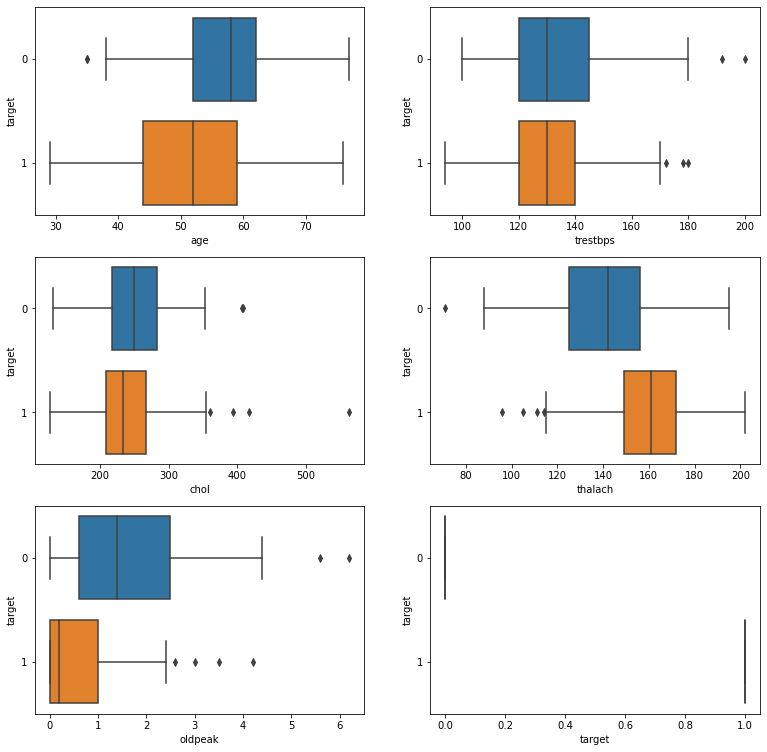

In [31]:
sub_boxplot(data = data.drop(['sex','cp','fbs','restecg','exang','slope','ca','thal'], axis = 1), y = 'target',n=13,m=13, orient ='h', num_col = 2)

In [41]:
# Let create function for ploting distribution of descrete variables
def sub_countplot(data, m=15, n=25, hue = None, num_col = None, *args):
    if data.shape[1] %2 == 0:
        i = data.shape[1]//num_col
    else:
        i = data.shape[1]//num_col + 1
    fig, axes = plt.subplots(i, num_col, figsize=(m, n))
    for i in range(i):
        for j in range(num_col):
            if (2*i+j) < data.shape[1]:
                sns.countplot(data[data.columns[2*i+j]], hue=hue, ax=axes[i,j] )
            else:
                axes[i,j].set_axis_off()

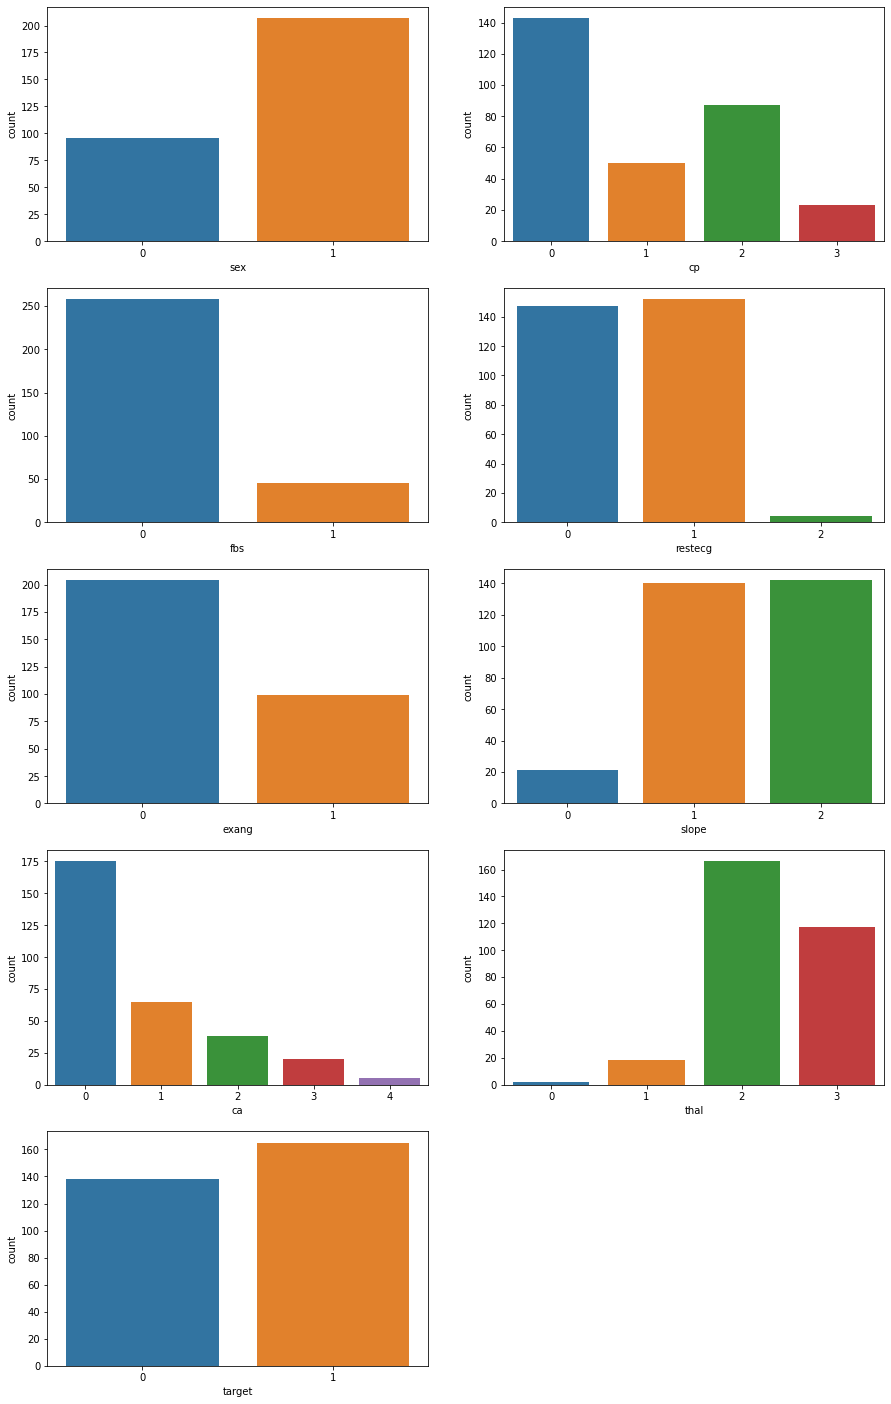

In [42]:
# Let see the distribution of each descrete feature and target variable
sub_countplot(data = data.drop(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], axis = 1), m=15, n=25, num_col = 2)

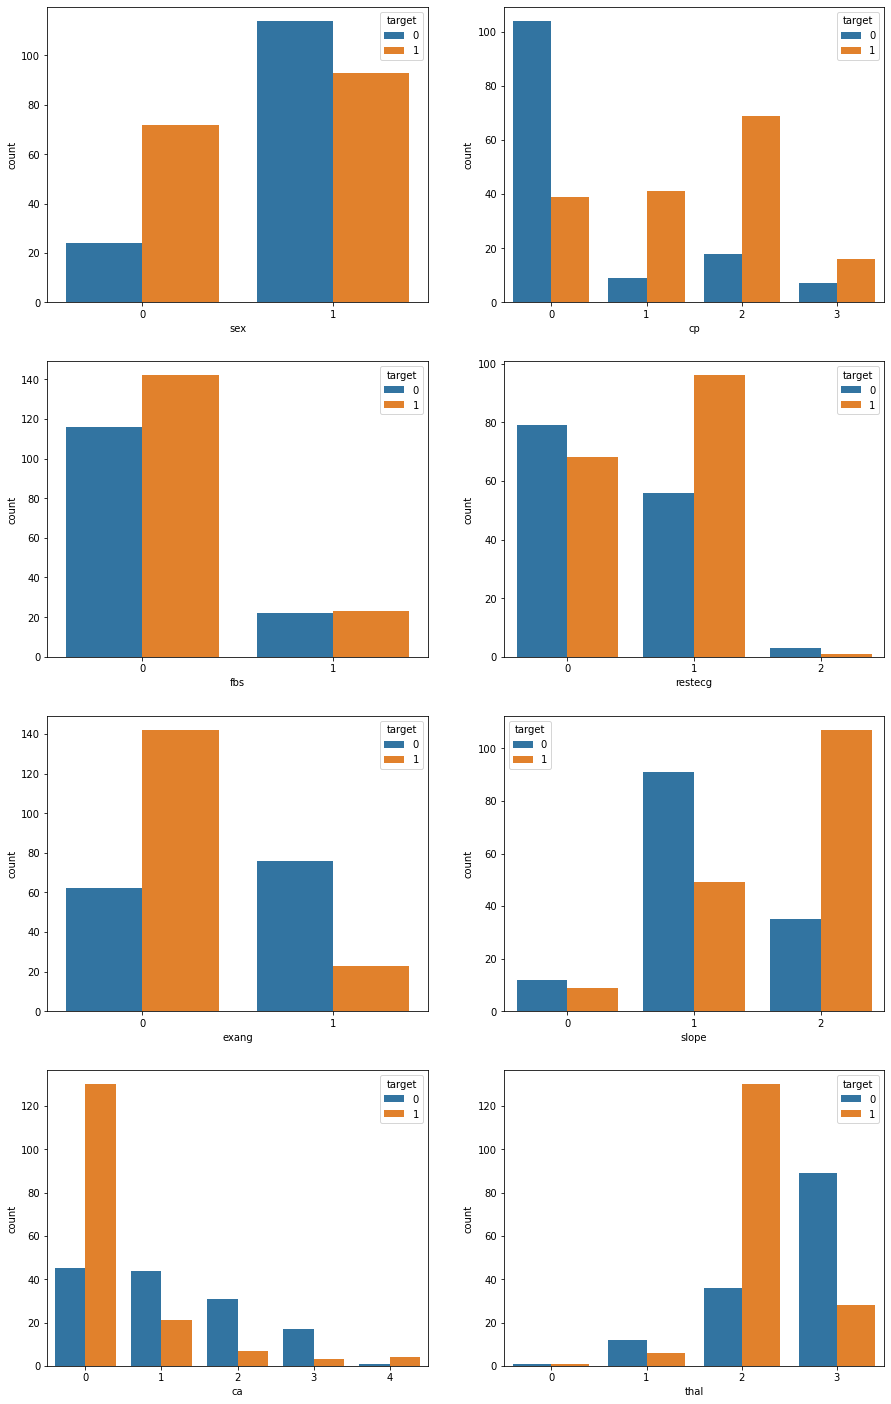

In [44]:
# Let see dist of descrete features by target
sub_countplot(data = data.drop(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target'], axis = 1), hue=data.target, m=15, n=25, num_col = 2)

#### Dealing with missing data

In [46]:
# Missing values in whole dataset
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Split dataset on train and test

In [48]:
X = data.drop('target', axis = 1)
y = data.target
print(X.head(2))
print(y)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   

   ca  thal  
0   0     1  
1   0     2  
0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [51]:
# Split independent and target variable on train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=0)

In [52]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (212, 13)
y_train shape: (212,)
X_test shape: (91, 13)
y_test shape: (91,)


#### Bringing features onto the same scale¶

In [57]:
# First we will try to normalize data and than we will observe the distribution of data
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler()

# transform training data
X_train_norm = norm.fit_transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [59]:
# Second we will try to standardize data and than we will observe the distribution of data
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

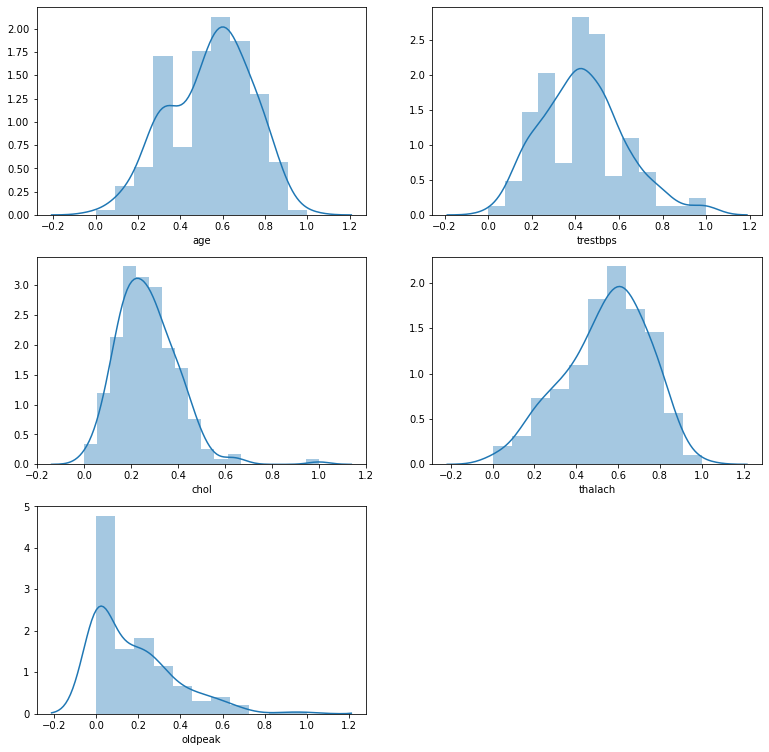

In [61]:
# Distribution of normalized data
col_names = list(data.columns)
col_names.remove('target')
df_norm = pd.DataFrame(data = X_train_norm, columns = col_names)
sub_hist(df_norm.iloc[:, [0,3,4,7,9]],m=13,n=13, num_col = 2)

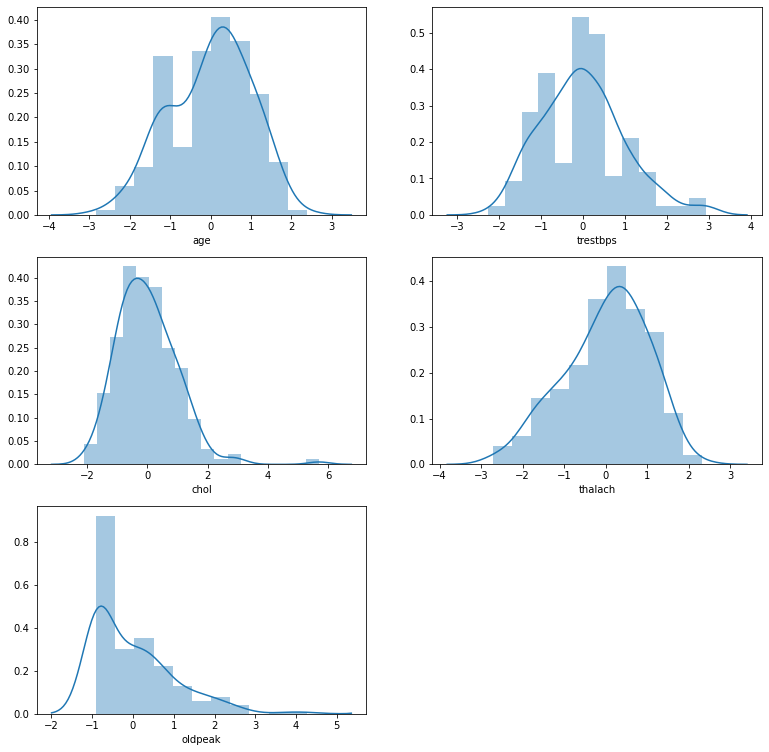

In [62]:
# Dist of standardized data
df_std = pd.DataFrame(data = X_train_std, columns = col_names)
sub_hist(df_std.iloc[:, [0,3,4,7,9]],m=13,n=13, num_col = 2)

#### Data modeling

Let put 10 or more different models on standardized dataset and than compare which one is modelling the best.

In [63]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Create dict acc_scores to see which model is the best
acc_scores = {}

In [64]:
# Define function for train,fit and predict new outcomes 
def train_model(model, X, y, X_test, y_test, model_name):
    clf = model
    scores = cross_val_score(clf, X_train_norm, y_train, cv=5)
    print(f"Cross_val_scores: {scores} \n ")
    print(f"Cross_val_scores_mean: {scores.mean()} \n ")
    print(f"Cross_val_scores_std: {scores.std()} \n")
    clf.fit(X_train_norm, y_train)
    y_pred = clf.predict(X_test_norm)
    acc_scores[model_name] = accuracy_score(y_test, y_pred)
    print(f"Acc_score of {model_name}: {acc_scores[model_name]}")
    return model, acc_scores

In [66]:
# First model SVC kernel linear
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, NuSVC, LinearSVC
svc_linear = SVC(kernel='linear', C=1)
model_1 = train_model(svc_linear, X_train_std, y_train, X_test_std, y_test, 'svc_linear')

Cross_val_scores: [0.81395349 0.88372093 0.80952381 0.76190476 0.85714286] 
 
Cross_val_scores_mean: 0.8252491694352159 
 
Cross_val_scores_std: 0.04200844545265024 

Acc_score of svc_linear: 0.7912087912087912


In [67]:
# Second model SVC_rbf
SVC_rbf = SVC()
model_2 = train_model(SVC_rbf, X_train_std, y_train, X_test_std, y_test, 'SVC_rbf')

Cross_val_scores: [0.81395349 0.86046512 0.80952381 0.73809524 0.85714286] 
 
Cross_val_scores_mean: 0.8158361018826135 
 
Cross_val_scores_std: 0.04423805630221341 

Acc_score of SVC_rbf: 0.8461538461538461


In [68]:
# Third model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_3 = train_model(rf, X_train_std, y_train, X_test_std, y_test, 'ran_forest_def')

Cross_val_scores: [0.79069767 0.81395349 0.83333333 0.76190476 0.85714286] 
 
Cross_val_scores_mean: 0.8114064230343299 
 
Cross_val_scores_std: 0.033040475377557506 

Acc_score of ran_forest_def: 0.8131868131868132


In [69]:
# Fourth model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
model_4 = train_model(log_reg, X_train_std, y_train, X_test_std, y_test, 'log_reg_def')

Cross_val_scores: [0.81395349 0.90697674 0.85714286 0.78571429 0.83333333] 
 
Cross_val_scores_mean: 0.839424141749723 
 
Cross_val_scores_std: 0.041104519793080656 

Acc_score of log_reg_def: 0.7912087912087912


Text(0, 0.5, 'Testing Accuracy')

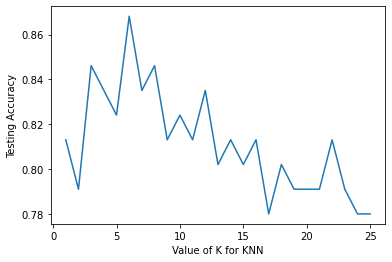

In [71]:
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_std,y_train)
        y_pred=knn.predict(X_test_std)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))


#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [72]:
#5th model KNN with 6 neighbors
KNN_6 = KNeighborsClassifier(n_neighbors=6)
model_5 = train_model(KNN_6, X_train_std, y_train, X_test_std, y_test, 'KNN_6_neigh')

Cross_val_scores: [0.69767442 0.81395349 0.78571429 0.83333333 0.78571429] 
 
Cross_val_scores_mean: 0.7832779623477297 
 
Cross_val_scores_std: 0.04644645542093351 

Acc_score of KNN_6_neigh: 0.8241758241758241


In [73]:
# 6th XGBoost
import xgboost as xgb
xg_class = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
# Fit the model
xg_class.fit(X_train_std,y_train)
# Test model
y_pred = xg_class.predict(X_test_std)
acc_scores['xgb_reg_logistic'] = accuracy_score(y_test, y_pred)

print(acc_scores['xgb_reg_logistic'])

0.7912087912087912


In [74]:
# 7th model SGDClassifier
from sklearn.linear_model import SGDClassifier
sgdclass = SGDClassifier(max_iter=1000, tol=1e-3)
model_7 = train_model(sgdclass, X_train_std, y_train, X_test_std, y_test, model_name = 'sgdclass')

Cross_val_scores: [0.76744186 0.6744186  0.76190476 0.76190476 0.80952381] 
 
Cross_val_scores_mean: 0.7550387596899224 
 
Cross_val_scores_std: 0.044082538346930024 

Acc_score of sgdclass: 0.6593406593406593


In [75]:
# 8th model ComplementNB
from sklearn.naive_bayes import ComplementNB
Comp_NB = ComplementNB()
model_8 = train_model(Comp_NB, X_train_std, y_train, X_test_std, y_test, model_name = 'ComplementNB')

Cross_val_scores: [0.76744186 0.81395349 0.85714286 0.76190476 0.85714286] 
 
Cross_val_scores_mean: 0.8115171650055372 
 
Cross_val_scores_std: 0.04140861323282895 

Acc_score of ComplementNB: 0.7802197802197802


In [78]:
# 9th model 
from sklearn.tree import DecisionTreeClassifier
Dec_tree_class = DecisionTreeClassifier(random_state=0)
model_9 = train_model(Dec_tree_class, X_train_std, y_train, X_test_std, y_test, model_name = 'Dec_tree_class')

Cross_val_scores: [0.72093023 0.81395349 0.85714286 0.69047619 0.73809524] 
 
Cross_val_scores_mean: 0.7641196013289037 
 
Cross_val_scores_std: 0.06181049011068901 

Acc_score of Dec_tree_class: 0.7472527472527473


In [79]:
# 10th model ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
extra_tree = ExtraTreeClassifier(random_state=0)
bag_class_extra_tree = BaggingClassifier(extra_tree, random_state=0)
model_10 = train_model(bag_class_extra_tree, X_train_std, y_train, X_test_std, y_test, model_name = 'bag_class_extra_tree')

Cross_val_scores: [0.81395349 0.79069767 0.78571429 0.9047619  0.76190476] 
 
Cross_val_scores_mean: 0.8114064230343299 
 
Cross_val_scores_std: 0.04951986703195052 

Acc_score of bag_class_extra_tree: 0.8681318681318682


In [97]:
# Lets plot the results of models
df_results = pd.DataFrame({'models': list(acc_scores.keys()),
                          'models_acc': list(acc_scores.values())})
df_results

,models,models_acc
0,svc_linear,0.791209
1,SVC_rbf,0.846154
2,ran_forest_def,0.813187
3,log_reg_def,0.791209
4,KNN_6_neigh,0.824176
5,xgb_reg_logistic,0.791209
6,sgdclass,0.659341
7,ComplementNB,0.780220
8,Dec_tree_class,0.747253
9,bag_class_extra_tree,0.868132


[Text(0, 0.5, 'models_acc')]

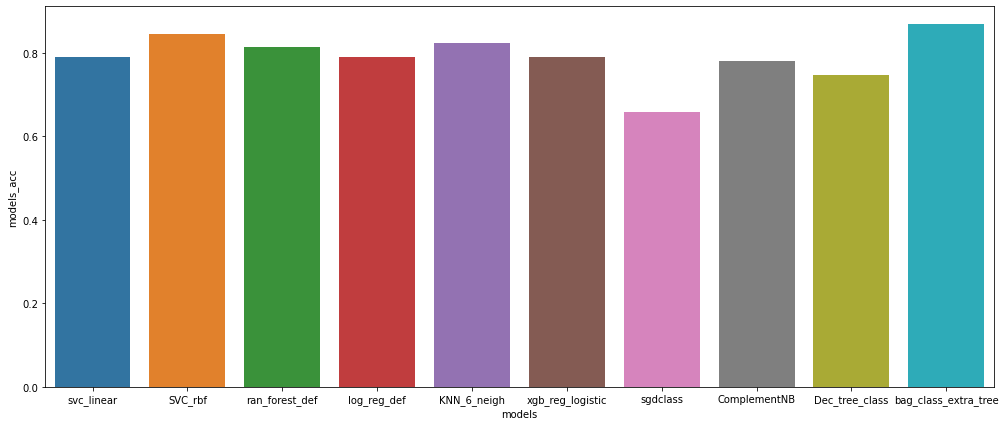

In [109]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x = "models", y = "models_acc", data = df_results)
ax.set(ylabel = "models_acc")

In [111]:
# Let see which model gives the best result
print(f"The model with best acc is {max(acc_scores, key=acc_scores.get)} and it's acc is {acc_scores[max(acc_scores, key=acc_scores.get)]:.3f}.")

The model with best acc is bag_class_extra_tree and it's acc is 0.868.


All this results are for normalized train and test dataset because the function train_model doesn't recive the new train and test set as it supposed to be by error. 